In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

Reading the Dataset

In [47]:
df = pd.read_csv(r'C:\Users\nuret\Desktop\data.csv')
df.drop('date',axis=1,inplace=True)
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [50]:
X=df.iloc[:,1:8]
y = df.iloc[:, 0]

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester
0,61211,4,0,0,71.76,0,0
1,62414,4,0,0,71.76,0,0
2,63015,4,0,0,71.76,0,0
3,63616,4,0,0,71.76,0,0
4,64217,4,0,0,71.76,0,0
...,...,...,...,...,...,...,...
62179,67348,5,1,0,61.07,0,1
62180,67955,5,1,0,61.07,0,1
62181,68560,5,1,0,56.71,0,1
62182,69167,5,1,0,56.71,0,1


In [ ]:
Standardization

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


In [61]:
from sklearn.decomposition import PCA

PCA = PCA()
PCA.fit_transform(scaled_X)

array([[-0.0358806 , -0.48666187, -1.81424321, ...,  0.19423672,
         1.7452435 ,  0.87750703],
       [-0.03601716, -0.50358608, -1.84922418, ...,  0.17183603,
         1.72642302,  0.87742222],
       [-0.03608538, -0.51204115, -1.86670012, ...,  0.160645  ,
         1.7170206 ,  0.87737984],
       ...,
       [-1.81501988, -0.40713446, -0.40274896, ..., -0.06854136,
        -1.09859421, -0.43860086],
       [-1.81508878, -0.41567394, -0.42039937, ..., -0.07984411,
        -1.1080905 , -0.43864366],
       [-1.81515734, -0.42417122, -0.43796255, ..., -0.09109101,
        -1.11753985, -0.43868624]])

Get the covariance

In [62]:
PCA.get_covariance()

array([[ 1.00001608e+00, -1.79321968e-03, -5.08815704e-04,
         2.85078360e-03,  1.84852463e-01,  9.55105884e-03,
         4.46766172e-02],
       [-1.79321968e-03,  1.00001608e+00,  7.91350923e-01,
        -7.58632581e-02,  1.11689106e-02, -1.17822146e-02,
        -4.82370614e-03],
       [-5.08815704e-04,  7.91350923e-01,  1.00001608e+00,
        -3.18993471e-02,  2.06736733e-02, -1.66460432e-02,
        -3.61277725e-02],
       [ 2.85078360e-03, -7.58632581e-02, -3.18993471e-02,
         1.00001608e+00, -8.85280154e-02, -1.48581472e-02,
        -7.07995743e-02],
       [ 1.84852463e-01,  1.11689106e-02,  2.06736733e-02,
        -8.85280154e-02,  1.00001608e+00,  9.32433629e-02,
         1.52478347e-01],
       [ 9.55105884e-03, -1.17822146e-02, -1.66460432e-02,
        -1.48581472e-02,  9.32433629e-02,  1.00001608e+00,
         2.09865473e-01],
       [ 4.46766172e-02, -4.82370614e-03, -3.61277725e-02,
        -7.07995743e-02,  1.52478347e-01,  2.09865473e-01,
         1.0000160

Explained Variance

In [64]:
Explained_variance=PCA.explained_variance_ratio_
Explained_variance

array([0.25724101, 0.19763625, 0.15230994, 0.14118937, 0.11201237,
       0.11008089, 0.02953017])

Cumulative Sum

In [65]:
# Calculate the cumulative sum of variance explained
cumulative_variance_explained = np.cumsum(Explained_variance)
print("Cumulative sum of variance explained: \n",cumulative_variance_explained,"\n")

Cumulative sum of variance explained: 
 [0.25724101 0.45487726 0.6071872  0.74837657 0.86038894 0.97046983
 1.        ] 



Text(0.5, 1.0, 'Explained variance vs Number of components')

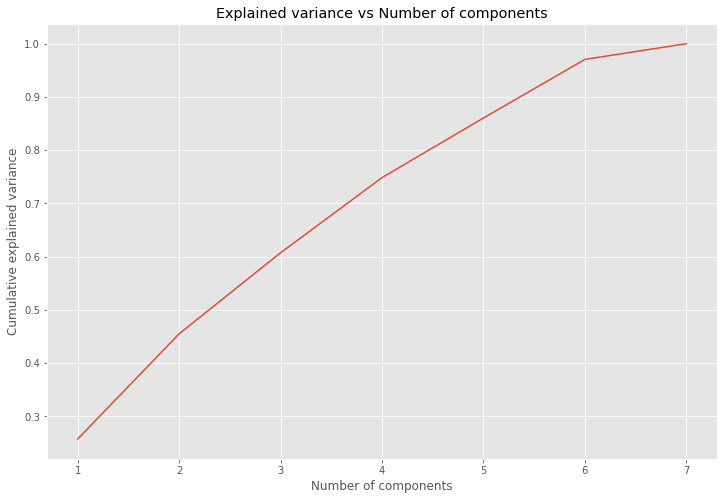

In [67]:
sns.lineplot(x = [1,2,3,4,5,6,7], y=cumulative_variance_explained)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

plt.title("Explained variance vs Number of components")

In [ ]:
PCA Transformation & fitting with 6 components

In [71]:
# Eigendecomposition of the covariance
# Sigma = W Lambda W^(-1)
eigen_values, eigen_vectors = np.linalg.eig(PCA.get_covariance())
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-0.00274834  0.00170695 -0.34060963 -0.70401245 -0.20402678 -0.45082698
   0.37877327]
 [-0.70391892 -0.70695338 -0.00155813  0.03302462 -0.04734626  0.00370685
   0.03696776]
 [-0.70212679  0.70538488  0.01946254  0.00874935 -0.09344307  0.01403306
  -0.0081404 ]
 [ 0.09498507 -0.03880973  0.24411685 -0.07330173 -0.91346724  0.29463415
  -0.05721691]
 [-0.03046349 -0.01838364 -0.55213258 -0.36000672  0.06092801  0.44765036
  -0.60014643]
 [ 0.0271285  -0.00176265 -0.45760139  0.49820236 -0.32202183 -0.56967184
  -0.33679703]
 [ 0.02867791  0.02826529 -0.55656213  0.34643284 -0.07461311  0.42990492
   0.61499283]] 

Eigenvalues: 
 [1.80071604 0.20671448 1.38347601 1.06618673 0.98834148 0.78409921
 0.77057862] 



In [72]:
#Taking six (06) components and create a projection matrix
projection_matrix = (eigen_vectors.T[:][:6]).T
projection_matrix

array([[-0.00274834,  0.00170695, -0.34060963, -0.70401245, -0.20402678,
        -0.45082698],
       [-0.70391892, -0.70695338, -0.00155813,  0.03302462, -0.04734626,
         0.00370685],
       [-0.70212679,  0.70538488,  0.01946254,  0.00874935, -0.09344307,
         0.01403306],
       [ 0.09498507, -0.03880973,  0.24411685, -0.07330173, -0.91346724,
         0.29463415],
       [-0.03046349, -0.01838364, -0.55213258, -0.36000672,  0.06092801,
         0.44765036],
       [ 0.0271285 , -0.00176265, -0.45760139,  0.49820236, -0.32202183,
        -0.56967184],
       [ 0.02867791,  0.02826529, -0.55656213,  0.34643284, -0.07461311,
         0.42990492]])

In [73]:
# PCA Transformation
# Calculate the product of X (standardized original data multiply by eigenvectors)
X_pca = X.dot(projection_matrix)

In [75]:
#Print first 10 rows of X_pca
X_pca[:10]

,0,1,2,3,4,5
0,-173.230429,100.336973,-20888.683193,-43119.008200,-12484.500391,-27563.431812
1,-176.536683,102.390431,-21298.436576,-43965.935180,-12729.944606,-28105.776664
2,-178.188435,103.416307,-21503.142962,-44389.046663,-12852.564701,-28376.723677
3,-179.840188,104.442183,-21707.849348,-44812.158147,-12975.184795,-28647.670689
4,-181.491941,105.468059,-21912.555735,-45235.269631,-13097.804890,-28918.617702
5,-183.155575,106.486765,-22117.477453,-45658.521517,-13220.401222,-29189.390131
6,-186.426100,108.518033,-22522.802910,-46496.296336,-13463.193090,-29725.874232
7,-188.077853,109.543909,-22727.509296,-46919.407820,-13585.813185,-29996.821245
8,-189.740600,110.576612,-22933.578121,-47345.335353,-13709.249386,-30269.571565
9,-191.392352,111.602488,-23138.284507,-47768.446837,-13831.869481,-30540.518578


In [ ]:
Conclusion: 
Based on the "Explained variance vs Number of components" we can see that for the first 06 components the cumulative explained variance is 97.04% (0.97046983). For the 7th component the explained variance is almost 03%. So, we can remove this component. This leave us with 6 principal components. 

Note: As the date column does not add any understandable correlation to me so I have dropped that column from the dataset.